In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [4]:
root_path = './backbone/data/backtest/experiments'
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'


path = 'Mode_train-Model_random_forest-TrainWw_11520-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_15-RR_2-CloseByTimeTrue-TS_False'
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [5]:
orders

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,2eb02c9c-374d-11ef-9a6a-958c92a01fe8,USDCAD,OperationType.BUY,2022-01-03 08:00:00,2022-01-03 15:00:00,1.2678,1.2678,1.2708,19.9343,1.2663,1.2708,6667,0.0030,ClosePositionType.TAKE_PROFIT
1,31aaa9b4-374d-11ef-9b37-958c92a01fe8,GBPUSD,OperationType.BUY,2022-01-04 08:00:00,2022-01-04 10:00:00,1.3463,1.3463,1.3493,20.0600,1.3448,1.3493,6800,0.0029,ClosePositionType.TAKE_PROFIT
2,31d0b1e9-374d-11ef-8837-958c92a01fe8,USDCAD,OperationType.SELL,2022-01-04 11:00:00,2022-01-04 14:00:00,1.2746,1.2746,1.2761,-10.6768,1.2761,1.2716,6933,-0.0015,ClosePositionType.STOP_LOSS
3,31d6b647-374d-11ef-9d31-958c92a01fe8,AUDUSD,OperationType.BUY,2022-01-04 11:00:00,2022-01-04 14:00:00,0.7211,0.7211,0.7196,-10.7461,0.7196,0.7242,6933,-0.0015,ClosePositionType.STOP_LOSS
4,31ef410a-374d-11ef-887f-958c92a01fe8,USDCHF,OperationType.SELL,2022-01-04 13:00:00,2022-01-04 17:00:00,0.9188,0.9188,0.9158,20.9377,0.9203,0.9158,6933,0.0030,ClosePositionType.TAKE_PROFIT
5,3246f536-374d-11ef-9bd8-958c92a01fe8,EURUSD,OperationType.BUY,2022-01-05 02:00:00,2022-01-05 10:00:00,1.1277,1.1277,1.1303,17.9487,1.1262,1.1307,6930,0.0026,ClosePositionType.DAYS
6,354e668c-374d-11ef-9535-958c92a01fe8,AUDUSD,OperationType.SELL,2022-01-05 19:00:00,2022-01-05 21:00:00,0.7264,0.7264,0.7234,20.7975,0.7278,0.7234,7050,0.0029,ClosePositionType.TAKE_PROFIT
7,358cce14-374d-11ef-acae-958c92a01fe8,GBPUSD,OperationType.SELL,2022-01-06 02:00:00,2022-01-06 08:00:00,1.3547,1.3547,1.3517,21.7796,1.3562,1.3517,7188,0.0030,ClosePositionType.TAKE_PROFIT
8,35ca1fb2-374d-11ef-85fa-958c92a01fe8,EURUSD,OperationType.SELL,2022-01-06 05:00:00,2022-01-06 09:00:00,1.1315,1.1315,1.1285,21.4921,1.1330,1.1285,7188,0.0030,ClosePositionType.TAKE_PROFIT
9,3882af7d-374d-11ef-b090-958c92a01fe8,USDCAD,OperationType.SELL,2022-01-06 16:00:00,2022-01-06 17:00:00,1.2761,1.2761,1.2776,-11.2155,1.2776,1.2731,7477,-0.0015,ClosePositionType.STOP_LOSS


In [6]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [7]:
orders.operation_type.value_counts()

operation_type
OperationType.SELL    286
OperationType.BUY     234
Name: count, dtype: int64

# Compras que salieron bien

In [8]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.6538461538461539

# Ventas que salieron bien

In [9]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

0.6713286713286714

# Cierres por SL y TP

In [10]:
orders.comment.value_counts()

comment
ClosePositionType.TAKE_PROFIT    263
ClosePositionType.STOP_LOSS      163
ClosePositionType.DAYS            94
Name: count, dtype: int64

In [11]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [12]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [13]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [14]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
4,USDCHF,47,11,13979.0169,81.0345
1,EURUSD,48,16,14914.2558,75.0000
3,USDCAD,76,34,20192.2370,69.0909
0,AUDUSD,69,32,18081.9991,68.3168
5,USDJPY,60,43,13517.6620,58.2524
2,GBPUSD,45,39,4858.1078,53.5714


# Rendimiento por mes

In [15]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2022,1,42,14.0000,11.0000,27.0000,15.0000,0.6430,28.9010,342.7600,1342.7600,0.3430
1,2022,2,45,19.0000,11.0000,32.0000,13.0000,0.7110,53.6260,716.5070,2059.2670,0.5340
2,2022,3,33,15.0000,11.0000,22.0000,11.0000,0.6670,60.0760,625.4600,2684.7270,0.3040
3,2022,4,36,19.0000,9.0000,27.0000,9.0000,0.7500,98.7140,1235.0730,3919.8010,0.4600
4,2022,5,52,26.0000,18.0000,34.0000,18.0000,0.6540,116.0280,2055.7740,5975.5740,0.5240
5,2022,6,47,25.0000,14.0000,32.0000,15.0000,0.6810,177.5600,2963.1910,8938.7650,0.4960
6,2022,7,45,26.0000,14.0000,30.0000,15.0000,0.6670,482.6090,5067.9980,14006.7630,0.5670
7,2022,8,55,27.0000,16.0000,37.0000,18.0000,0.6730,585.8010,8581.1270,22587.8900,0.6130
8,2022,9,34,15.0000,13.0000,20.0000,14.0000,0.5880,556.8000,5803.2860,28391.1760,0.2570


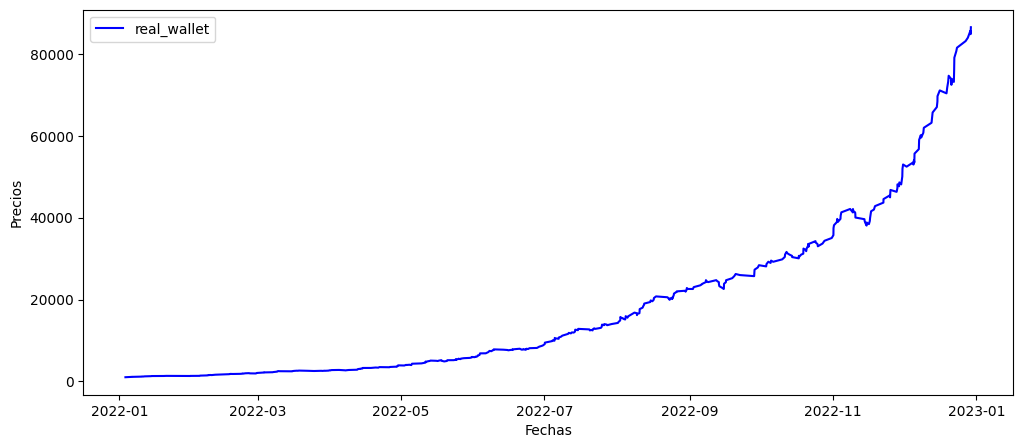

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [17]:
orders_per_month_gb.perc_change.mean()

0.45649999999999996

In [18]:
orders_per_month_gb.perc_change.std()

0.1377174313915668

In [19]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.3430,4029.0000
2,0.5340,6180.4860
3,0.3040,8059.3537
4,0.4600,11766.6565
5,0.5240,17932.3845
6,0.4960,26826.8471
7,0.5670,42037.6695
8,0.6130,67806.7609
9,0.2570,85233.0984


# Rendimiento por dia

In [20]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==1]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2022,1,1,1.0000,0.0000,1.0000,0.0000,100.0000,19.9340,19.9340,1019.9340,0.0200
1,2022,1,4,2.0000,2.0000,2.0000,2.0000,50.0000,20.9380,19.5750,1039.5090,0.0190
2,2022,1,2,1.0000,0.0000,2.0000,0.0000,100.0000,20.7980,38.7460,1078.2550,0.0360
3,2022,1,3,2.0000,1.0000,2.0000,1.0000,66.6670,21.7800,32.0560,1110.3120,0.0290
4,2022,1,5,1.0000,1.0000,3.0000,2.0000,60.0000,22.7380,34.9390,1145.2500,0.0310
5,2022,1,2,1.0000,0.0000,2.0000,0.0000,100.0000,23.1340,45.7340,1190.9840,0.0380
6,2022,1,4,1.0000,1.0000,3.0000,1.0000,75.0000,24.2450,37.5040,1228.4880,0.0310
7,2022,1,1,1.0000,0.0000,1.0000,0.0000,100.0000,24.4880,24.4880,1252.9760,0.0200
8,2022,1,2,0.0000,0.0000,2.0000,0.0000,100.0000,28.9010,53.8770,1306.8530,0.0410
9,2022,1,1,0.0000,0.0000,1.0000,0.0000,100.0000,7.5790,7.5790,1314.4330,0.0060


In [21]:
# ticker = 'EURUSD'
# date_from = datetime(2022,1,1)
# date_to = date_from + timedelta(days=30)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label=f'{ticker} Price', color='blue')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title(f'{ticker} Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     a = input()
    
#     clear_output(wait=True)

#     date_from += timedelta(days=7)
#     date_to = date_from + timedelta(days=15)


In [22]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss     profit  tp_cumsum  sl_cumsum  \
year month day                                                            
2022 1     3              1          0    19.9343          1          0   
           4              2          2    19.5748          3          2   
           5              1          0    38.7462          4          2   
           6              2          1    32.0562          6          3   
           7              1          1    34.9385          7          4   
           10             1          0    45.7337          8          4   
           11             1          1    37.5044          9          5   
           13             1          0    24.4881         10          5   
           14             0          0    53.8769         10          5   
           18             0          0     7.5794         10          5   
           19             0          1     6.8829         10          6   
           21             1          0    26.3389         11          6   
           24             0          1    -3.2343         11          7   
           25             1          1    -1.4341         12          8   
           26             0          1   -22.8201         12          9   
           28             0          2   -26.1635         12         11   
           31             2          0    48.7579         14         11   
     2     3              1          0    26.4084          1          0   
           4              2          1    40.8991          3          1   
           7              1          0    96.5696          4          1   
           8              2          1    63.6099          6          2   
           9              1          1     3.2165          7          3   
           10             2          0    56.5060          9          3   
           11             0          0    18.5300          9          3   
           15             1          0    59.6757         10          3   
           16             1          0    51.2820         11          3   
           17             2          0    69.7935         13          3   
           18             0          1   -18.0486         13          4   
           21             0          1    15.4094         13          5   
           22             3          0   111.7404         16          5   
           23             1          2    39.5086         17          7   
           25             1          3   -19.3892         18         10   
           28             1          1   100.7955         19         11   
     3     1              1          0    40.7722          1          0   
           2              1          0    42.0000          2          0   
           3              1          1    51.6115          3          1   
           7              2          0    87.7279          5          1   
           8              0          0    60.0756          5          1   
           9              3          0   172.7951          8          1   
           10             0          1   -25.8135          8          2   
           15             1          1    24.8700          9          3   
           16             1          0    50.4326         10          3   
           17             1          0    51.3000         11          3   
           18             1          1    25.4439         12          4   
           21             0          1   -26.2285         12          5   
           22             0          1   -26.1420         12          6   
           23             0          1   -23.2929         12          7   
           24             0          1   -25.1355         12          8   
           28             0          1    20.5922         12          9   
           29             1          1    25.4328         13         10   
           31             2          1    99.0189         15         11   
     4     1              1          0   

# Que hubiera pasado si no se operaba con algunos tickers?

In [23]:
# tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
# print(tickers_permitidos)

tickers_permitidos = [
    'EURUSD', 
    'GBPUSD', 
    # 'USDJPY', 
    'USDCAD', 
    'AUDUSD', 
    'USDCHF'
]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [24]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
17,2022,2,1,1.0000,0.0000,1.0000,0.0000,100.0000,26.4080,26.4080,1366.8130,0.0190
18,2022,2,3,2.0000,1.0000,2.0000,1.0000,66.6670,27.4750,40.8990,1407.7120,0.0290
19,2022,2,3,0.0000,0.0000,3.0000,0.0000,100.0000,25.1920,67.7700,1475.4810,0.0460
20,2022,2,3,1.0000,1.0000,2.0000,1.0000,66.6670,30.7960,33.6100,1509.0910,0.0220
21,2022,2,3,1.0000,1.0000,1.0000,2.0000,33.3330,30.8520,3.2160,1512.3080,0.0020
22,2022,2,3,2.0000,0.0000,2.0000,1.0000,66.6670,32.3790,56.5060,1568.8140,0.0360
23,2022,2,2,1.0000,0.0000,2.0000,0.0000,100.0000,32.6400,59.6760,1628.4890,0.0370
24,2022,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,17.0820,17.0820,1645.5710,0.0100
25,2022,2,2,2.0000,0.0000,2.0000,0.0000,100.0000,34.9550,69.7940,1715.3650,0.0410
26,2022,2,1,0.0000,1.0000,0.0000,1.0000,0.0000,-18.0490,-18.0490,1697.3160,-0.0110


In [25]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [26]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
4,USDCHF,47,11,13979.0169,0.8103
1,EURUSD,48,16,14914.2558,0.7500
3,USDCAD,76,34,20192.2370,0.6909
0,AUDUSD,69,32,18081.9991,0.6832
2,GBPUSD,45,39,4858.1078,0.5357


In [27]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

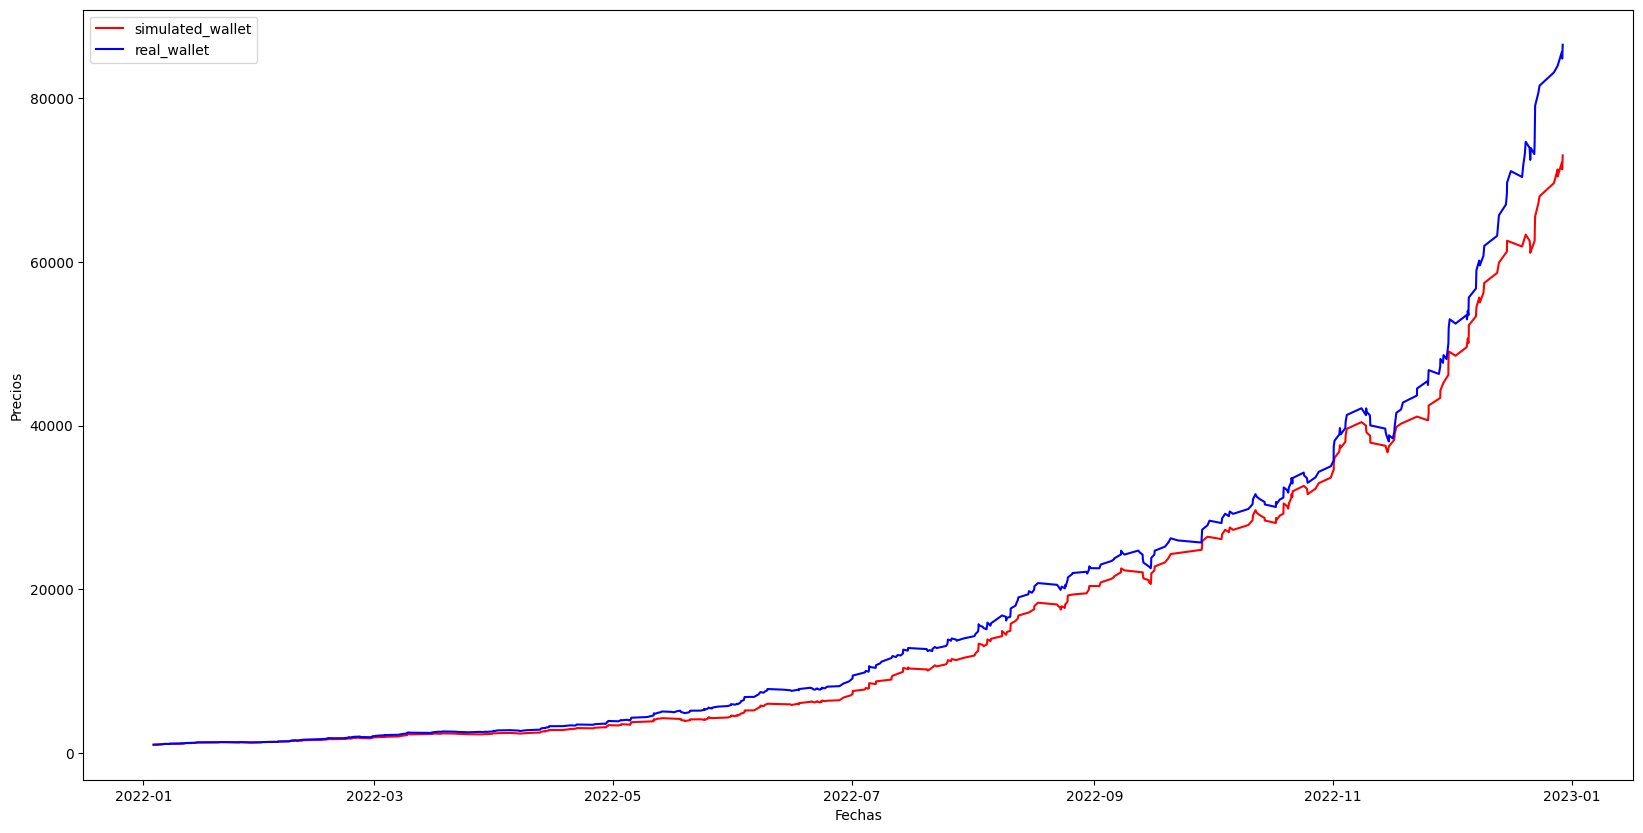

In [28]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [36]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [30]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.7546454184006339
0.39356984478935697
0.4703859090304917


              precision    recall  f1-score   support

         0.0       0.85      0.37      0.51      4698
         1.0       0.12      0.58      0.20       714

    accuracy                           0.39      5412
   macro avg       0.49      0.47      0.36      5412
weighted avg       0.75      0.39      0.47      5412

Confusion Matrix
[[1717 2981]
 [ 301  413]]


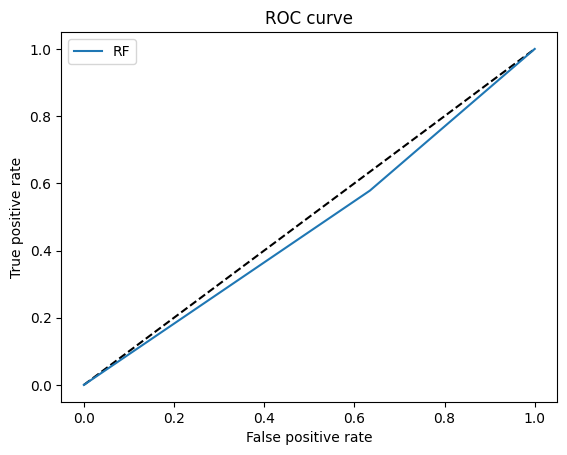

In [31]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [38]:
predictions

,y_true,y_pred,proba
0,0.0000,1.0000,36446 0.504027\n7998 0.616865\n50670 ...
1,0.0000,1.0000,22223 0.643659\n64895 0.574034\n79119 ...
2,0.0000,0.0000,36449 0.596307\n22225 0.557124\n64897 ...
3,1.0000,0.0000,22227 0.512688\n8003 0.597092\n50675 ...
4,0.0000,0.0000,22228 0.509513\n50676 0.531588\n8004 ...
...,...,...,...
5407,0.0000,1.0000,71079 0.501279\n28407 0.514832\n56855 ...
5408,0.0000,1.0000,42634 0.537130\n56858 0.561605\n71082 ...
5409,0.0000,0.0000,28413 0.521329\n56861 0.558748\n14189 ...
5410,0.0000,1.0000,85311 0.512375\n14191 0.548094\n42639 ...


In [32]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [ ]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
threshold = 0.499291802702681
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
threshold = 0.499291802702681
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
predictions[predictions['proba']>threshold]

In [ ]:
predictions.head(50)

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [ ]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.5)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [ ]:
pipeline_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/forex_ml_bot/backbone/data/backtest/experiments/Mode_train-Model_gradient_boosting-TrainWw_5760-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_2-CloseByTimeTrue-TS_True/pipe.pkl'

In [ ]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

features = get_xgboost_feature_importance_from_stacking(pipeline)
features_df = pd.DataFrame({'feature':features.keys(), 'importance':features.values()})
features_df.sort_values(by='importance', ascending=False)

In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()